# Data on spread of salary
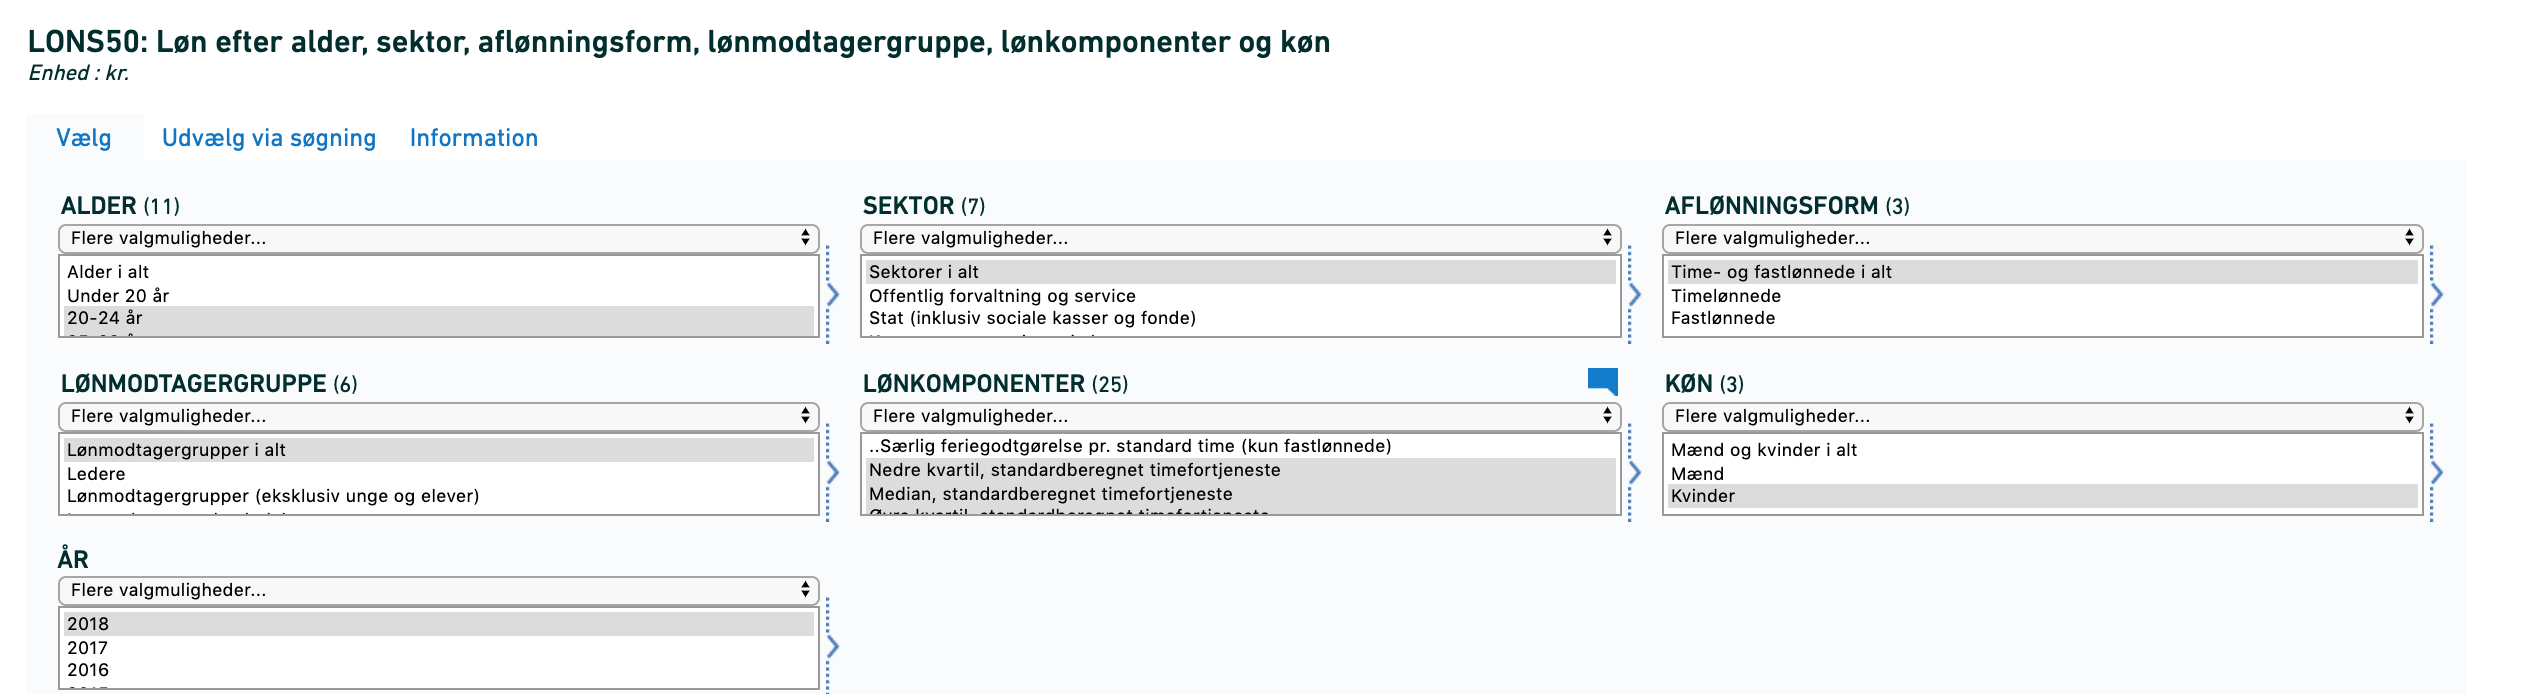

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [139]:
df_men_raw = pd.read_csv('..//data//LONS_50_men_quartiles.csv', encoding='latin-1', sep=';', header=None)
df_men_raw.columns = ['gender', 'personal_group', 'payment', 'sectors', 'year', 'age', 'mean', 'lower_quartile',  'median' ,'upper_quartile']


In [140]:
df_women_raw = pd.read_csv('..//data//LONS_50_women_quartiles.csv', encoding='latin-1', sep=';', header=None)
df_women_raw.columns = ['gender', 'personal_group', 'payment', 'sectors', 'year', 'age', 'mean', 'lower_quartile',  'median' ,'upper_quartile']


In [141]:
df_men = df_men_raw[['age', 'mean','lower_quartile', 'median','upper_quartile']]
df_women = df_women_raw[['age', 'mean','lower_quartile', 'median','upper_quartile']]

In [142]:
def get_low_age(x):
    r = x.split('-')[0]
    return int(r)

def get_high_age(x):
    r = x.split('-')[1]
    v = r.split()[0]
    return int(v)
    
df_men['low_age'] = df_men['age'].apply(get_low_age)
df_men['high_age'] = df_men['age'].apply(get_high_age)
df_men['mean_age'] = (df_men['low_age'] + df_men['high_age']) / 2

df_women['low_age'] = df_women['age'].apply(get_low_age)
df_women['high_age'] = df_women['age'].apply(get_high_age)
df_women['mean_age'] = (df_women['low_age'] + df_women['high_age']) / 2

/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/

Text(0.5, 1.0, 'Women Wage Profiles')

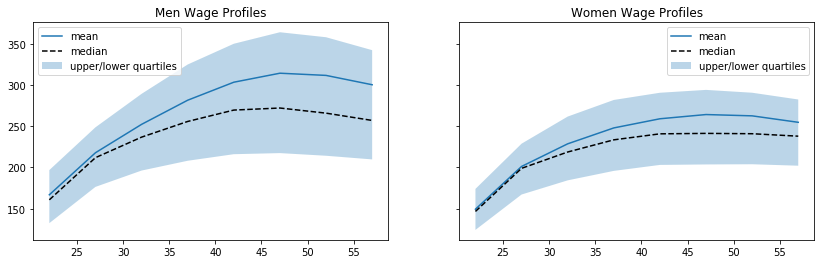

In [143]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4), sharey=True)

ax1.fill_between(df_men['mean_age'], df_men['lower_quartile'], df_men['upper_quartile'], alpha=0.3, label='upper/lower quartiles')
ax1.plot(df_men['mean_age'], df_men['mean'], label='mean')
ax1.plot(df_men['mean_age'], df_men['median'], ls='--', color='black', label='median')
ax1.legend()
ax1.set_title('Men Wage Profiles')

ax2.fill_between(df_women['mean_age'], df_women['lower_quartile'], df_women['upper_quartile'], alpha=0.3, label='upper/lower quartiles')
ax2.plot(df_women['mean_age'], df_women['mean'], label='mean')
ax2.plot(df_women['mean_age'], df_women['median'], ls='--', color='black', label='median')
ax2.legend()
ax2.set_title('Women Wage Profiles')


In [144]:
df_men.to_pickle('..//data//wage_quartiles_empirical_men.pkl')

In [145]:
df_women.to_pickle('..//data//wage_quartiles_empirical_women.pkl')

In [146]:
df_women['median'].mean()

219.8575

In [147]:
df_men['mean'].mean()

268.55375

In [149]:
df_women['mean'].mean()

233.4875

In [150]:
df_men

,age,mean,lower_quartile,median,upper_quartile,low_age,high_age,mean_age
0,20-24 år,166.83,132.42,160.74,196.82,20,24,22.0
1,25-29 år,217.85,176.42,211.88,248.70,25,29,27.0
2,30-34 år,252.29,196.23,236.79,289.31,30,34,32.0
3,35-39 år,281.60,208.12,255.81,324.93,35,39,37.0
4,40-44 år,303.44,216.09,269.63,350.10,40,44,42.0
5,45-49 år,314.36,217.42,272.12,364.07,45,49,47.0
6,50-54 år,311.70,214.20,265.90,358.02,50,54,52.0
7,55-59 år,300.36,209.76,257.06,342.33,55,59,57.0
